In [1]:
!pip install opendatasets --upgrade --quiet

In [2]:
import opendatasets as od

dataset_url = 'https://www.kaggle.com/datasets/quadeer15sh/celeba-face-recognition-triplets/data'
od.download(dataset_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: mrunaldivekar2525
Your Kaggle Key: ··········


100%|██████████| 231M/231M [00:02<00:00, 90.6MB/s]


In [3]:
import os
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
from PIL import Image
import numpy as np

In [ ]:
# Define the PixelCNN model
class PixelCNN(nn.Module):
    def __init__(self, input_channels=3, num_filters=64, kernel_size=7):
        super(PixelCNN, self).__init__()

        # Input layer
        self.input_layer = nn.Conv2d(input_channels, num_filters, kernel_size, padding=kernel_size//2)

        # Hidden layers
        self.hidden_layers = nn.ModuleList([
            nn.Conv2d(num_filters, num_filters, kernel_size=kernel_size, padding=kernel_size//2)
            for _ in range(7)
        ])

        # Output layer
        self.output_layer = nn.Conv2d(num_filters, input_channels, kernel_size=1)

    def forward(self, x):
        # Input layer
        out = F.relu(self.input_layer(x))

        # Hidden layers
        for layer in self.hidden_layers:
            out = F.relu(layer(out))

        # Output layer
        out = self.output_layer(out)

        return out

In [12]:
import torch.nn as nn
import torch.nn.functional as F

class PixelCNN(nn.Module):
    def __init__(self, input_channels=3, num_filters=32, kernel_size=3):
        super(PixelCNN, self).__init__()

        # Input layer
        self.input_layer = nn.Conv2d(input_channels, num_filters, kernel_size=kernel_size, padding=kernel_size//2)

        # Hidden layers
        self.hidden_layer = nn.Conv2d(num_filters, num_filters, kernel_size=kernel_size, padding=kernel_size//2)

        # Output layer
        self.output_layer = nn.Conv2d(num_filters, input_channels, kernel_size=1)

    def forward(self, x):
        # Input layer
        out = F.relu(self.input_layer(x))

        # Hidden layer
        out = F.relu(self.hidden_layer(out))

        # Output layer
        out = self.output_layer(out)

        return out


In [7]:
# Custom dataset class for CelebA Face Recognition Triplets
class CelebADataset(Dataset):
    def __init__(self, root_dir, transform=None):
        self.root_dir = root_dir
        self.transform = transform

        # Assuming the dataset directory contains images directly
        self.image_paths = [os.path.join(root_dir, img) for img in os.listdir(root_dir)]

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        img_path = self.image_paths[idx]
        image = Image.open(img_path)

        if self.transform:
            image = self.transform(image)

        return image

In [5]:
# Define data transformations
transform = transforms.Compose([
    transforms.Resize((64, 64)),  # Resize images to 64x64
    transforms.ToTensor(),         # Convert images to tensors
])

In [8]:
# Create dataset and dataloader
dataset = CelebADataset('/content/celeba-face-recognition-triplets/CelebA FR Triplets/CelebA FR Triplets/images', transform=transform)
dataloader = DataLoader(dataset, batch_size=128, shuffle=True)

In [13]:
# Initialize PixelCNN model
model = PixelCNN()

In [14]:
# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [ ]:
# Training loop
num_epochs = 1
for epoch in range(num_epochs):
    for batch in dataloader:
        # Forward pass
        images = batch
        outputs = model(images)

        # Compute loss
        loss = criterion(outputs, images)

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    # Print epoch loss
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

In [15]:
# Set a larger batch size
batch_size = 64

# Update the DataLoader with the new batch size
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

# Training loop
num_epochs = 1
for epoch in range(num_epochs):
    running_loss = 0.0
    for i, batch in enumerate(dataloader, 1):
        # Forward pass
        images = batch
        outputs = model(images)

        # Compute loss
        loss = criterion(outputs, images)

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # Print statistics
        running_loss += loss.item()
        if i % 100 == 0:  # Print every 100 mini-batches
            print(f'Epoch [{epoch+1}/{num_epochs}], Step [{i}/{len(dataloader)}], Loss: {running_loss / 100:.4f}')
            running_loss = 0.0

    # Print epoch loss
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss / len(dataloader):.4f}')


Epoch [1/1], Step [100/725], Loss: 1.6050
Epoch [1/1], Step [200/725], Loss: 1.6020
Epoch [1/1], Step [300/725], Loss: 1.5966
Epoch [1/1], Step [400/725], Loss: 1.5887
Epoch [1/1], Step [500/725], Loss: 1.6009
Epoch [1/1], Step [600/725], Loss: 1.6009
Epoch [1/1], Step [700/725], Loss: 1.5931
Epoch [1/1], Loss: 0.0543


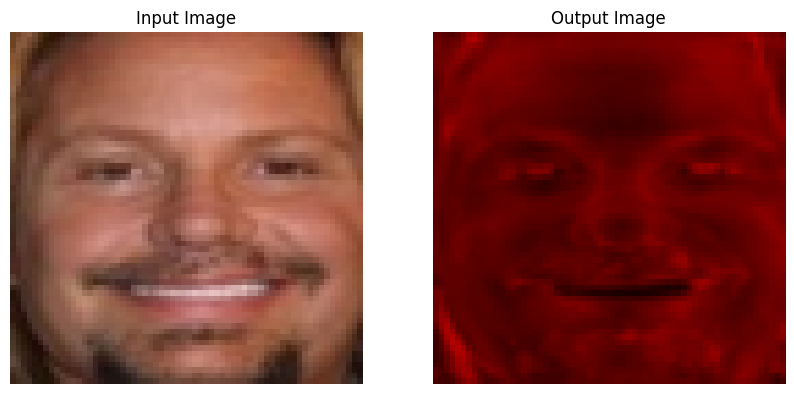

In [17]:
import matplotlib.pyplot as plt
# Display input and output images

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
axes[0].imshow(images[0].permute(1, 2, 0))  # Display input image
axes[0].set_title('Input Image')
axes[0].axis('off')
axes[1].imshow(outputs[0].detach().cpu().permute(1, 2, 0))  # Display output image
axes[1].set_title('Output Image')
axes[1].axis('off')
plt.show()

Epoch [1/5], Step [100/725], Loss: 1.5932


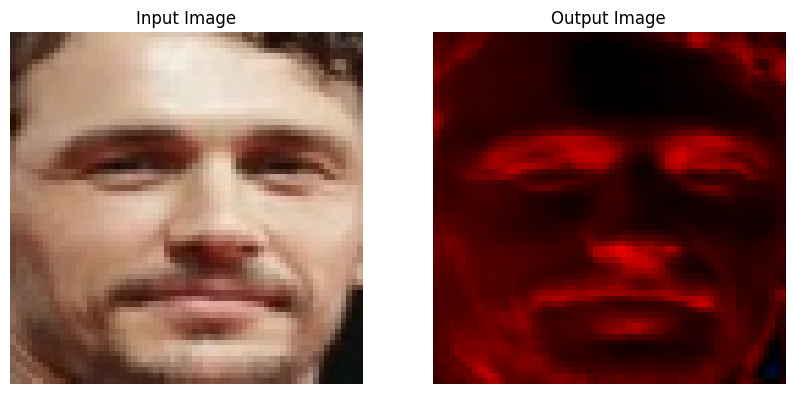

Epoch [1/5], Step [200/725], Loss: 1.5937


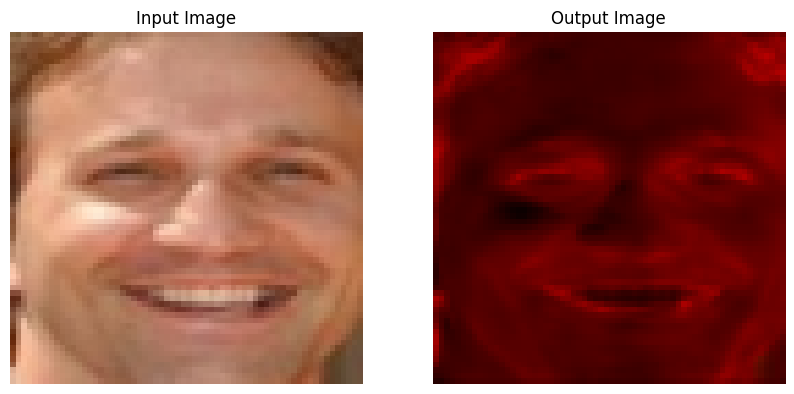

Epoch [1/5], Step [300/725], Loss: 1.5874


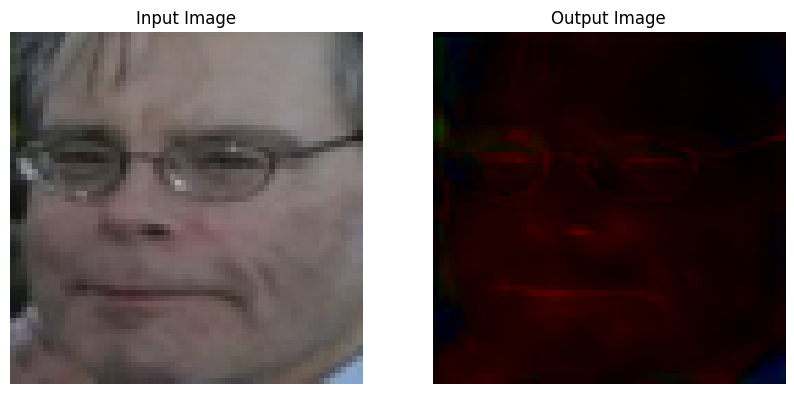

Epoch [1/5], Step [400/725], Loss: 1.6040


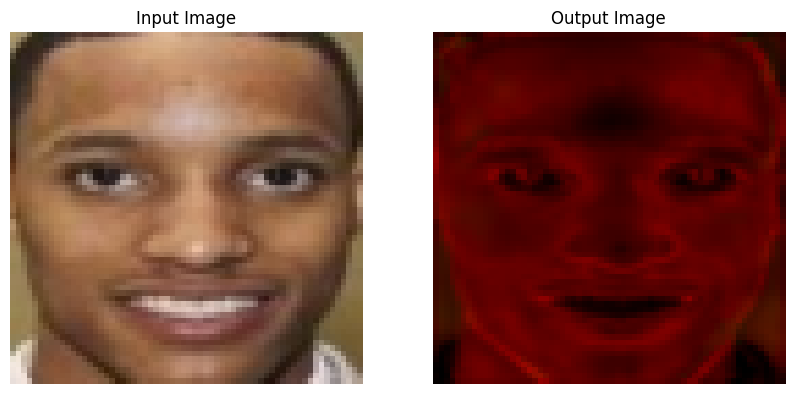

Epoch [1/5], Step [500/725], Loss: 1.6003


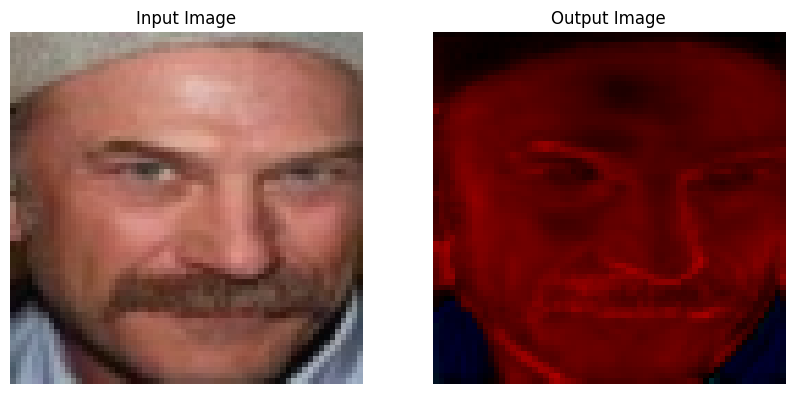

Epoch [1/5], Step [600/725], Loss: 1.5963


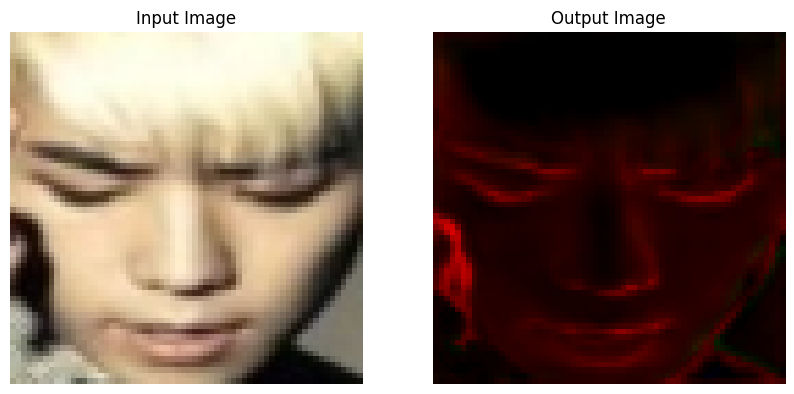

Epoch [1/5], Step [700/725], Loss: 1.5963


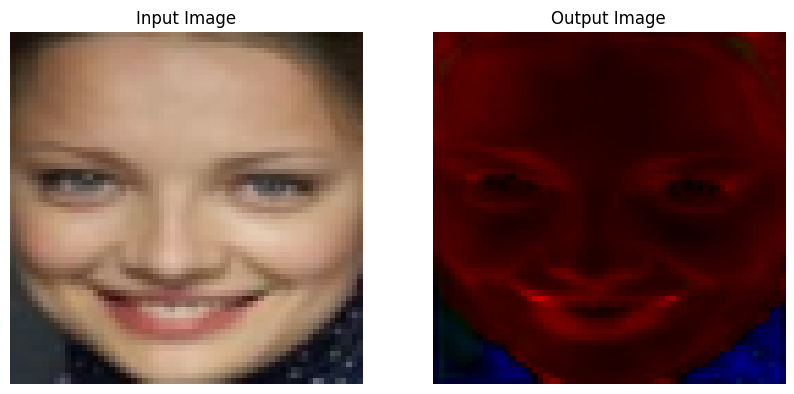

Epoch [1/5], Loss: 0.0551


Epoch [2/5], Step [100/725], Loss: 1.6023


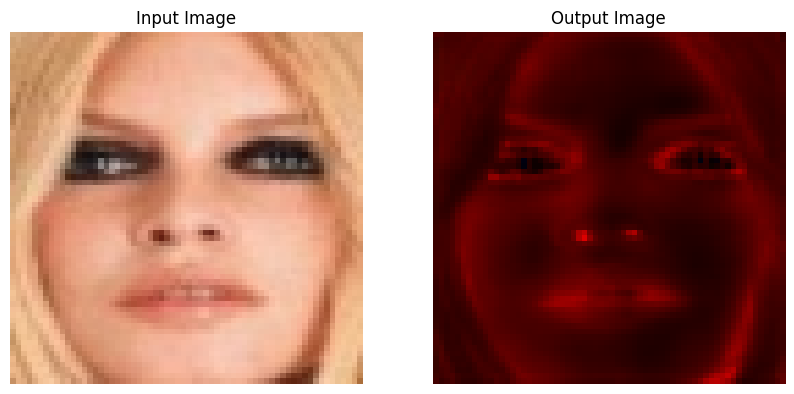

Epoch [2/5], Step [200/725], Loss: 1.5977


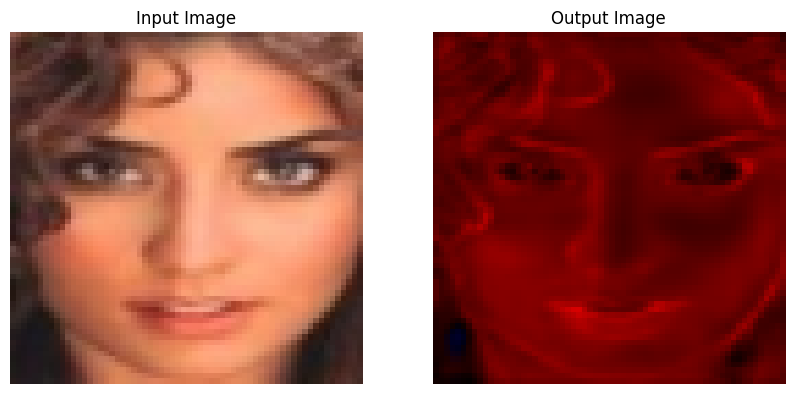

Epoch [2/5], Step [300/725], Loss: 1.5902


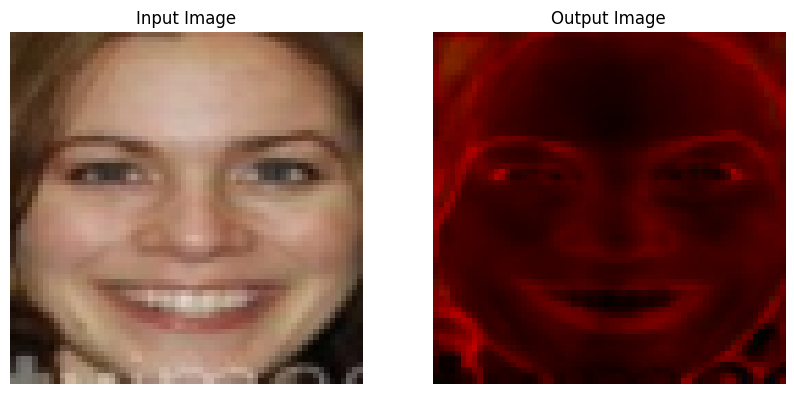

Epoch [2/5], Step [400/725], Loss: 1.5959


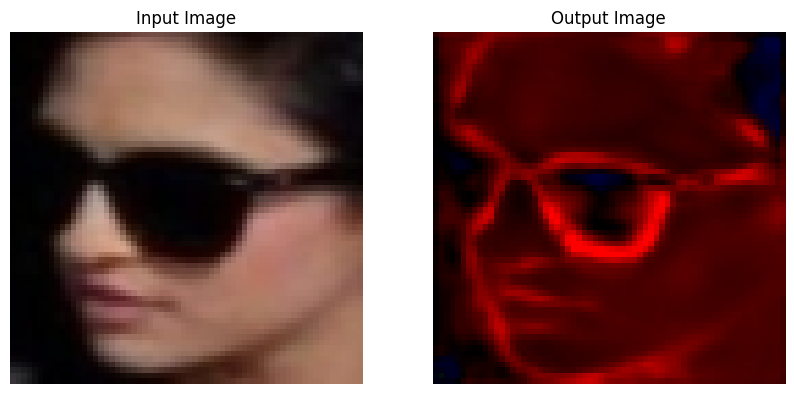

Epoch [2/5], Step [500/725], Loss: 1.5920


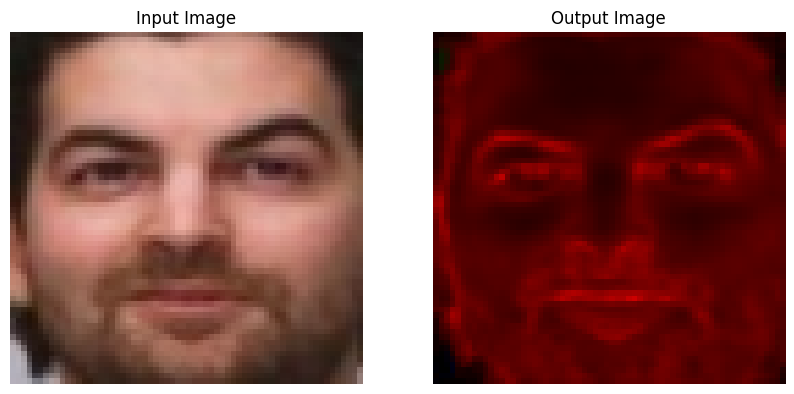

Epoch [2/5], Step [600/725], Loss: 1.5940


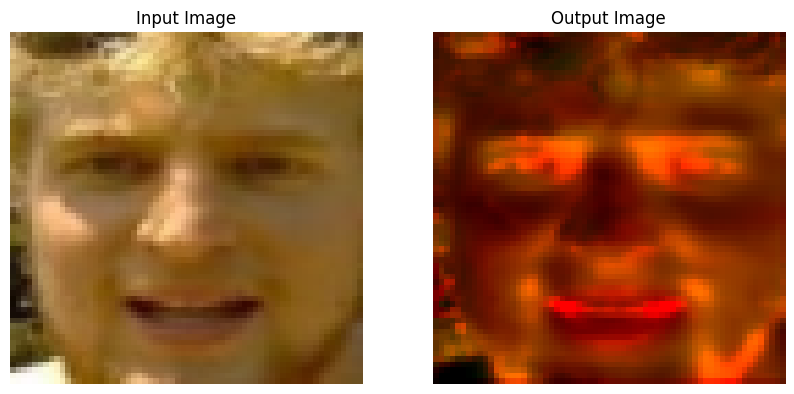

Epoch [2/5], Step [700/725], Loss: 1.5998


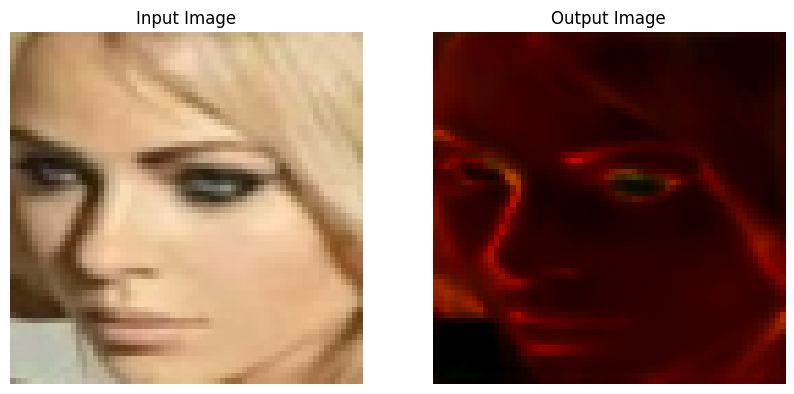

Epoch [2/5], Loss: 0.0548


Epoch [3/5], Step [100/725], Loss: 1.5951


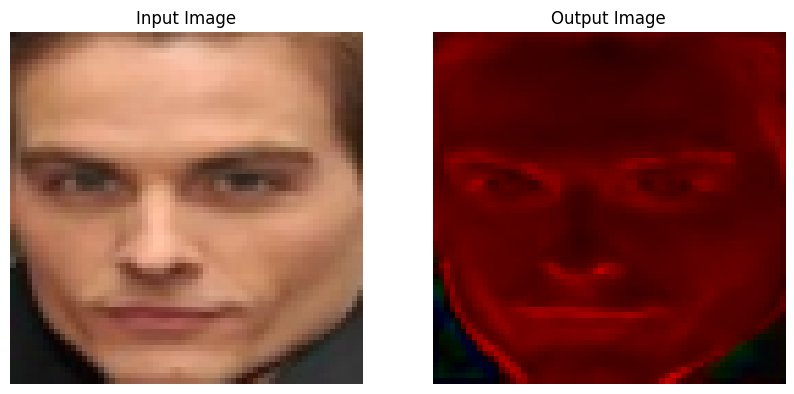

Epoch [3/5], Step [200/725], Loss: 1.5890


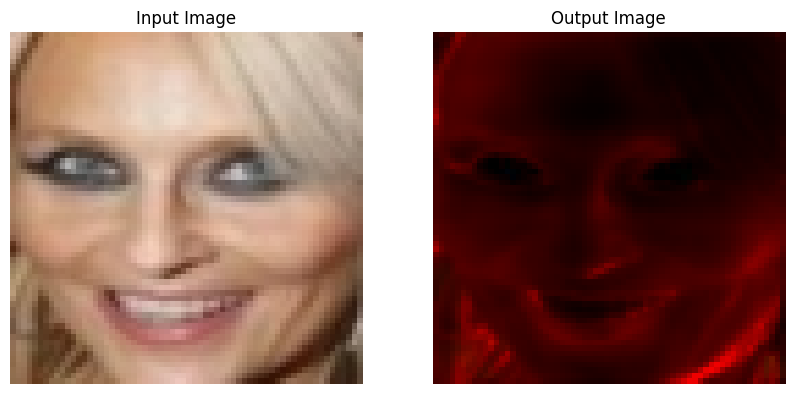

Epoch [3/5], Step [300/725], Loss: 1.5945


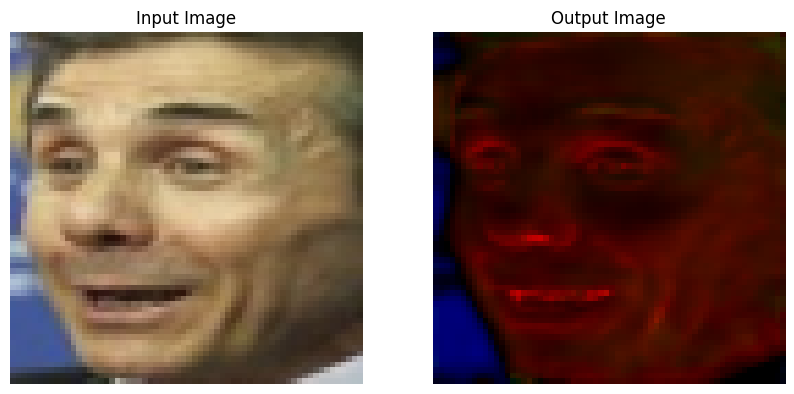

Epoch [3/5], Step [400/725], Loss: 1.5979


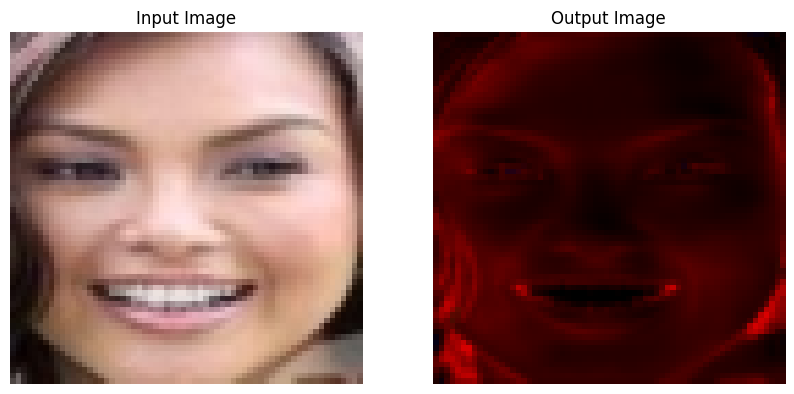

Epoch [3/5], Step [500/725], Loss: 1.5994


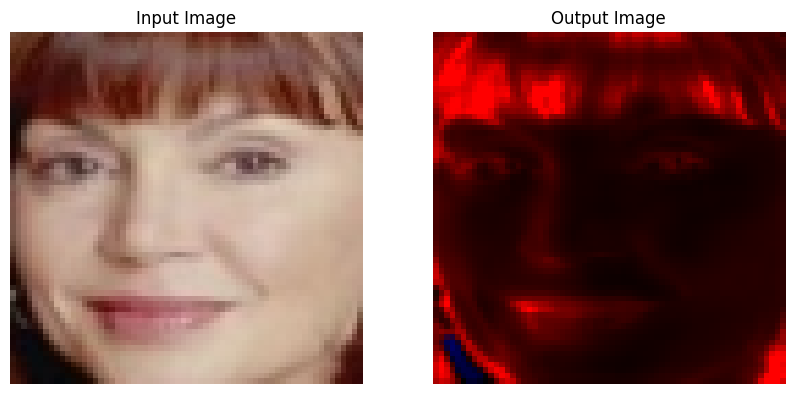

Epoch [3/5], Step [600/725], Loss: 1.5968


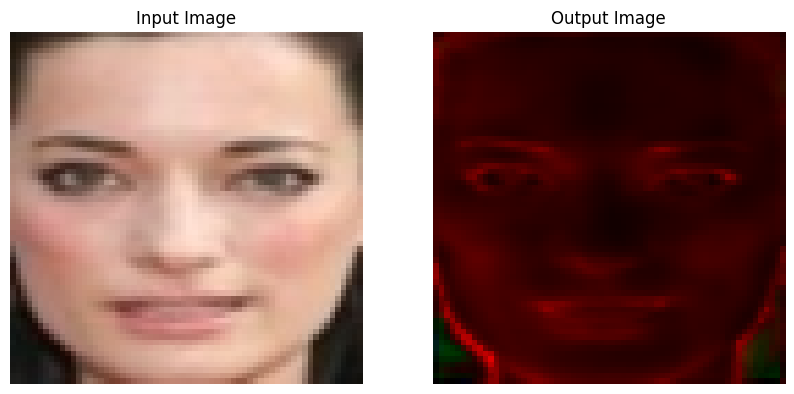

Epoch [3/5], Step [700/725], Loss: 1.5991


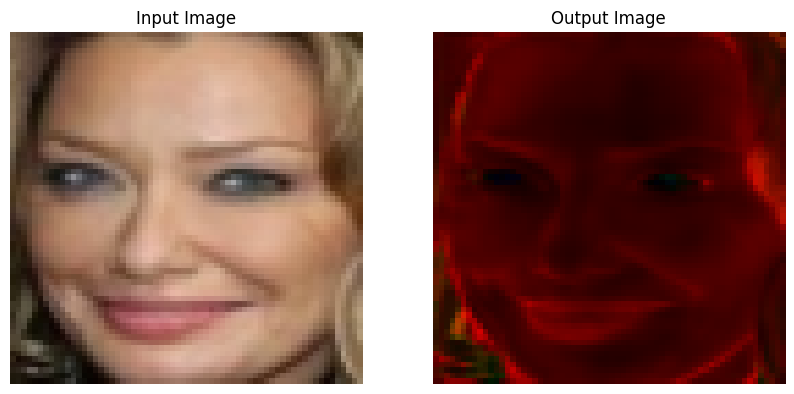

Epoch [3/5], Loss: 0.0548


Epoch [4/5], Step [100/725], Loss: 1.5969


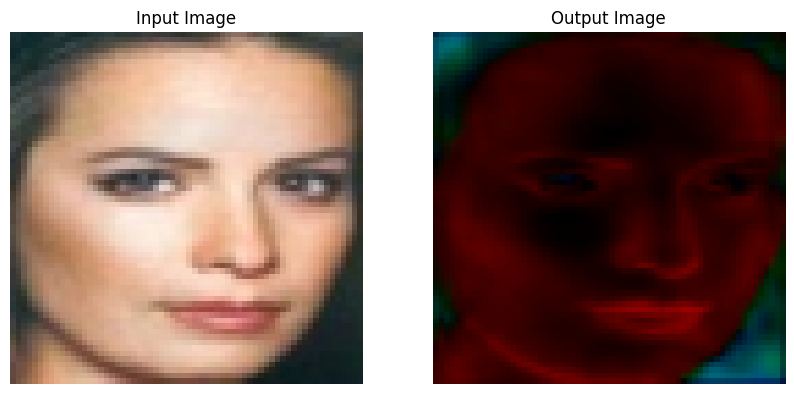

Epoch [4/5], Step [200/725], Loss: 1.5947


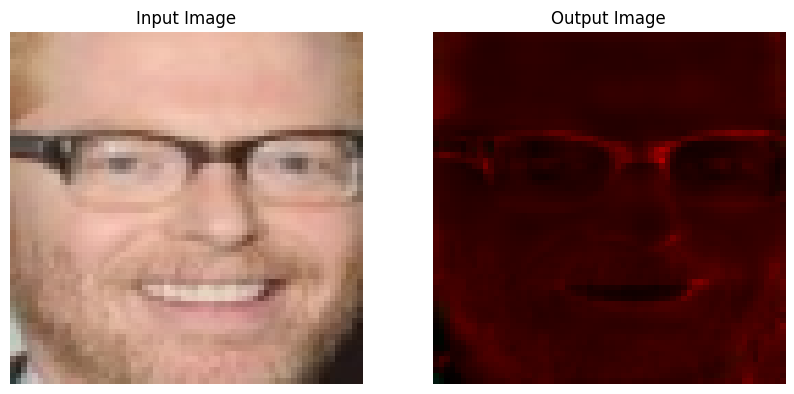

Epoch [4/5], Step [300/725], Loss: 1.5933


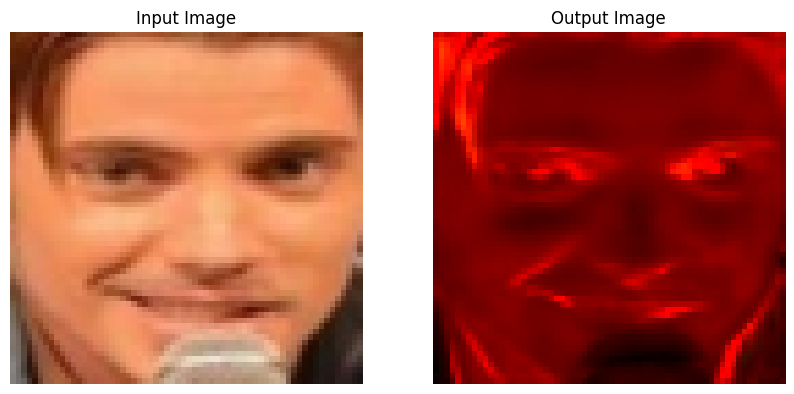

Epoch [4/5], Step [400/725], Loss: 1.6007


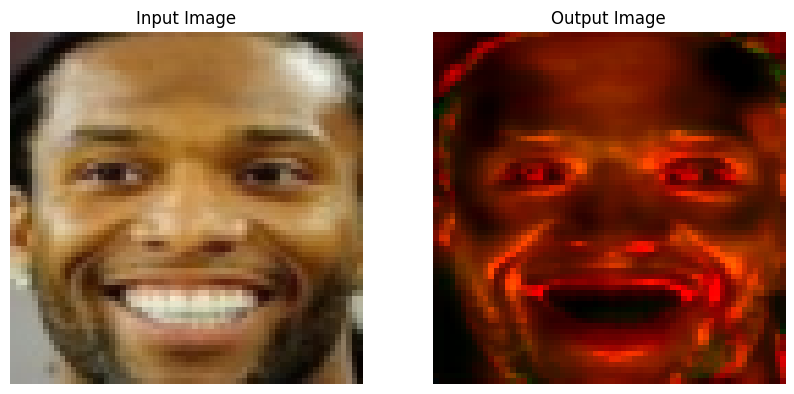

Epoch [4/5], Step [500/725], Loss: 1.5864


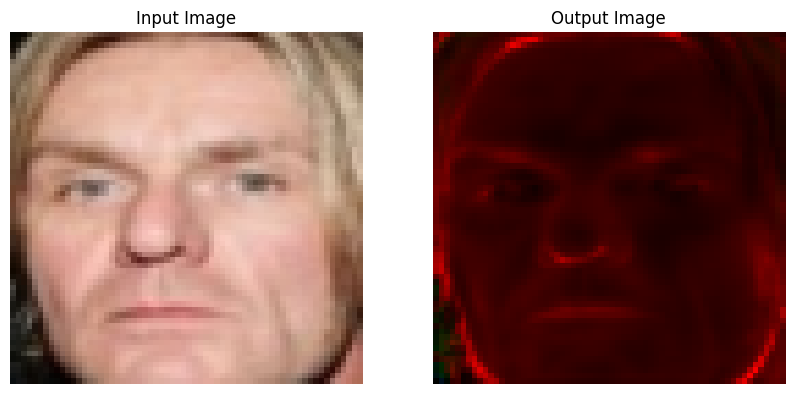

Epoch [4/5], Step [600/725], Loss: 1.5968


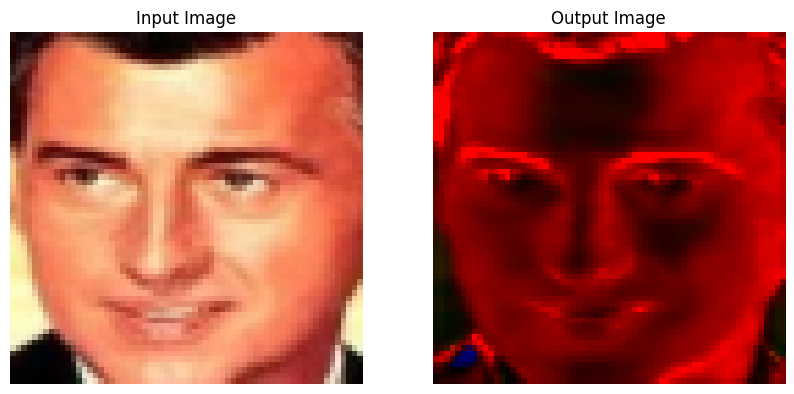

Epoch [4/5], Step [700/725], Loss: 1.5965


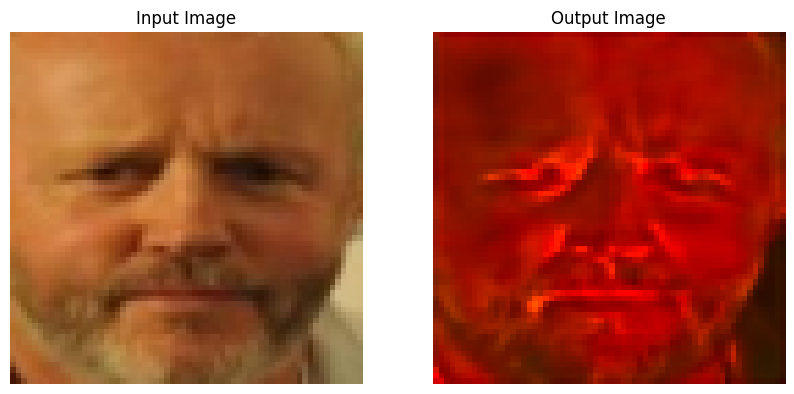

Epoch [4/5], Loss: 0.0556


Epoch [5/5], Step [100/725], Loss: 1.5969


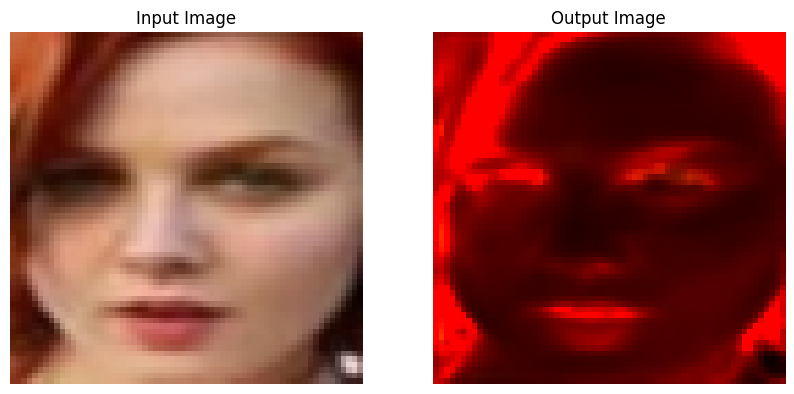

Epoch [5/5], Step [200/725], Loss: 1.6014


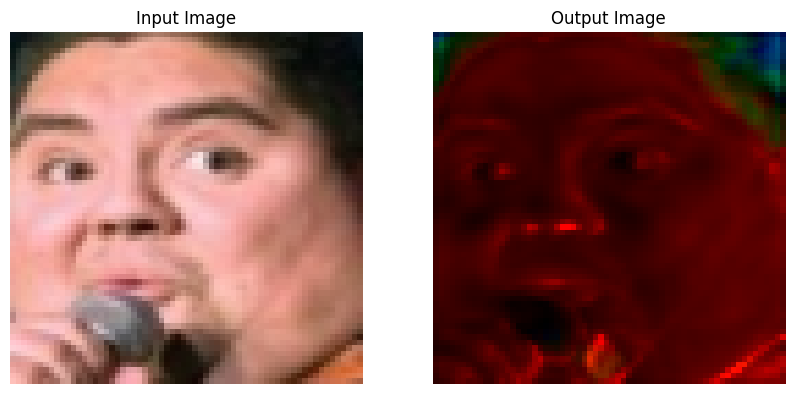

Epoch [5/5], Step [300/725], Loss: 1.5979


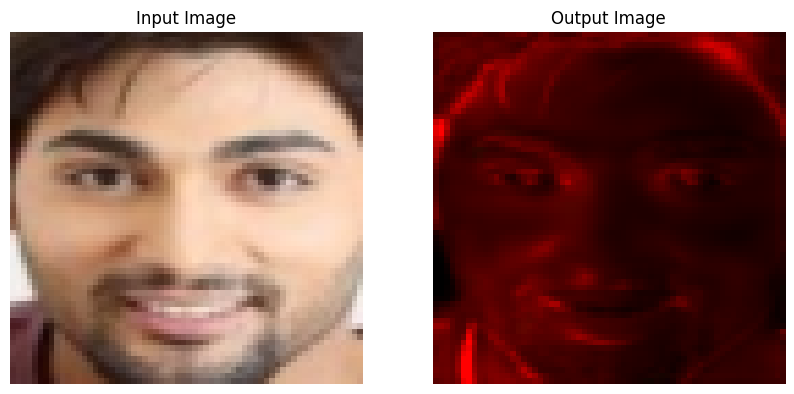

Epoch [5/5], Step [400/725], Loss: 1.5916


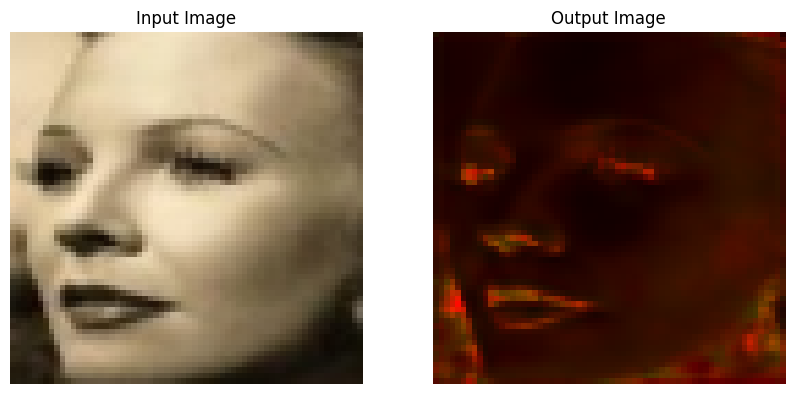

Epoch [5/5], Step [500/725], Loss: 1.5949


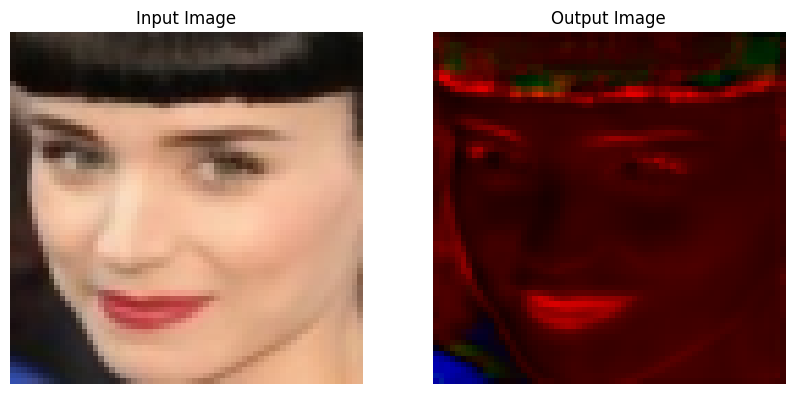

Epoch [5/5], Step [600/725], Loss: 1.6003


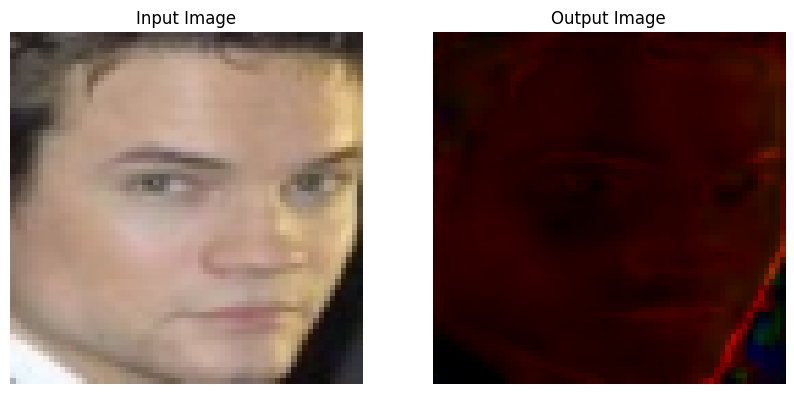

Epoch [5/5], Step [700/725], Loss: 1.5902


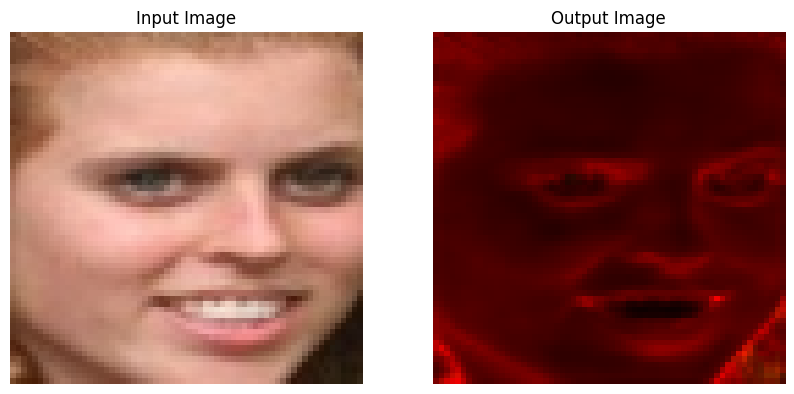

Epoch [5/5], Loss: 0.0545


In [18]:
import matplotlib.pyplot as plt
# Set a larger batch size
batch_size = 64

# Update the DataLoader with the new batch size
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)
# Training loop
num_epochs = 5
for epoch in range(num_epochs):
    running_loss = 0.0
    for i, batch in enumerate(dataloader, 1):
        # Forward pass
        images = batch
        outputs = model(images)

        # Compute loss
        loss = criterion(outputs, images)

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # Print statistics
        running_loss += loss.item()
        if i % 100 == 0:  # Print every 100 mini-batches
            print(f'Epoch [{epoch+1}/{num_epochs}], Step [{i}/{len(dataloader)}], Loss: {running_loss / 100:.4f}')
            running_loss = 0.0

            # Display input and output images
            fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
            axes[0].imshow(images[0].permute(1, 2, 0))  # Display input image
            axes[0].set_title('Input Image')
            axes[0].axis('off')
            axes[1].imshow(outputs[0].detach().cpu().permute(1, 2, 0))  # Display output image
            axes[1].set_title('Output Image')
            axes[1].axis('off')
            plt.show()

    # Print epoch loss
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss / len(dataloader):.4f}')


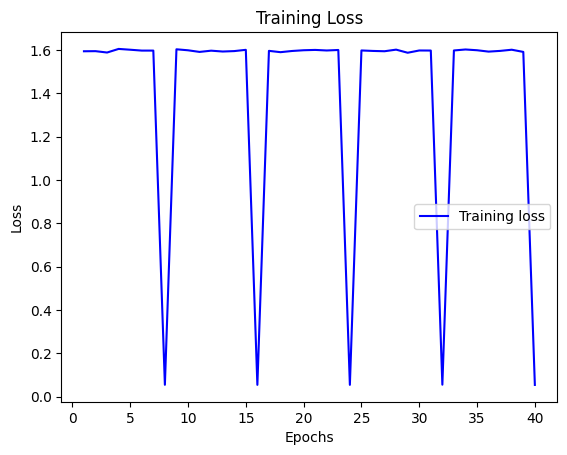

In [1]:
import matplotlib.pyplot as plt

# Loss values
loss_values = [1.5932, 1.5937, 1.5874, 1.6040, 1.6003, 1.5963, 1.5963, 0.0551,
               1.6023, 1.5977, 1.5902, 1.5959, 1.5920, 1.5940, 1.5998, 0.0548,
               1.5951, 1.5890, 1.5945, 1.5979, 1.5994, 1.5968, 1.5991, 0.0548,
               1.5969, 1.5947, 1.5933, 1.6007, 1.5864, 1.5968, 1.5965, 0.0556,
               1.5969, 1.6014, 1.5979, 1.5916, 1.5949, 1.6003, 1.5902, 0.0545]

# Number of epochs
epochs = range(1, len(loss_values) + 1)

# Plotting the loss graph
plt.plot(epochs, loss_values, 'b', label='Training loss')
plt.title('Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

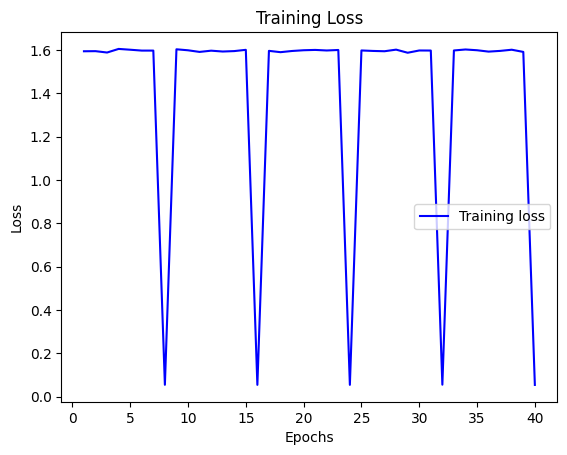

In [2]:
import matplotlib.pyplot as plt

# Loss values
loss_values = [1.5932, 1.5937, 1.5874, 1.6040, 1.6003, 1.5963, 1.5963, 0.0551, 1.6023, 1.5977, 1.5902, 1.5959, 1.5920, 1.5940, 1.5998, 0.0548, 1.5951, 1.5890, 1.5945, 1.5979, 1.5994, 1.5968, 1.5991, 0.0548, 1.5969, 1.5947, 1.5933, 1.6007, 1.5864, 1.5968, 1.5965, 0.0556, 1.5969, 1.6014, 1.5979, 1.5916, 1.5949, 1.6003, 1.5902, 0.0545]

# Number of epochs
epochs = range(1, len(loss_values) + 1)

# Plotting the loss graph
plt.plot(epochs, loss_values, 'b', label='Training loss')
plt.title('Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()